<a href="https://colab.research.google.com/github/Dssdiego/paa_trabalho2/blob/main/paa_trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 - Tempos de Execução

**Projeto e Análise de Algoritmos** </br>
**Alunos:** Diego S. Seabra (0040251); Manoel S. Seabra (0039949) </br>

## Introdução

Neste trabalho, fizemos a implementação e análise de 4 algoritmos de ordenação, sendo eles:

- Insertion Sort
- Selection Sort
- Merge Sort
- Heap Sort 

Para cada um destes algoritmos, foram criados variados tamanhos de instâncias: 

- 125 mil
- 250 mil
- 500 mil
- 1 milhão 
- 2 milhões 

Também foram criadas distribuições diferentes:

- Crescente
- Decrescente
- Aleatório
- 50% Ordenado

## Desenvolvimento

Começamos o desenvolvimento importando as bibliotecas a serem utilizadas no projeto e implementando os métodos de ordenação

In [72]:
# Importações
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import requests

from numpy import random
from PIL import Image

In [59]:
# Definições dos algoritmos

##################
# INSERTION SORT #
##################

def insertionSort(arr): 
	# Percorre de 1 até o tamanho do arranjo
	for b in range(1, len(arr)): 
		chave = arr[b] 
		i = b - 1

		while i >= 0 and chave < arr[i]: 
				arr[i + 1] = arr[i] 
				i -= 1

		arr[i + 1] = chave 

##################
# SELECTION SORT #
##################

def selectionSort(arr):
    # Percorre de 1 até o tamanho do arranjo
    for i in range(0, len(arr)):
        indiceMin = i

        # Encontra o índice do menor elemento no arranjo restante
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[indiceMin]:
                indiceMin = j

        # Troca o elemento mínimo com o primeiro elemento
        arr[i] = arr[indiceMin]
        arr[indiceMin] = arr[i]

##############
# MERGE SORT #
##############

def mergeSort(arr):
    # Começa a ordenar a partir do primeiro elemento
    if len(arr) > 1:

      # Meio do arranjo
      mid = len(arr) // 2 # (divisão com retorno de número inteiro)

      # Parte da esquerda
      esquerda = arr[:mid]

      # Parte da direita
      direita = arr[mid:]

      # Ordena a parte da esquerda
      mergeSort(esquerda)

      # Ordena a parte da direita
      mergeSort(direita)

      # Inicialização de variáveis
      i = j = k = 0

      # Copia para os arranjos temporários
      while i < len(esquerda) and j < len(direita):
        if esquerda[i] < direita[j]:
          arr[k] = esquerda[i]
          i += 1
        else:
          arr[k] = direita[j]
          j += 1
        k += 1

      # Verifica se há algum elemento faltando (arranjo da esquerda)
      while i < len(esquerda):
        arr[k] = esquerda[i]
        i += 1
        k += 1

      # Verifica se há algum elemento faltando (arranjo da direita)
      while j < len(direita):
        arr[k] = direita[j]
        j += 1
        k += 1

#############
# HEAP SORT #
#############

def heapMax(arr, n, i):
    # Inicializa o maior elemento como a raiz da árvore
    maior = i       

    # Esquerda = 2*i + 1
    esquerda = 2 * i + 1

    # Direita = 2*i + 2
    direita = 2 * i + 2
 
    # Verifica se o filho da esquerda existe e se é maior que a raiz
    if esquerda < n and arr[maior] < arr[esquerda]:
        maior = esquerda
 
    # Verifica se o filho da direita existe e se é maior que a raiz
    if direita < n and arr[maior] < arr[direita]:
        maior = direita
 
    # Troca da raiz
    if maior != i:

        # Troca os elementos
        arr[i] = arr[maior]
        arr[maior] = arr[i]
 
        # Deixa a raiz com heap máximo
        heapMax(arr, n, maior)

def heapSort(arr):
    # N = tamanho do array
    n = len(arr)
 
    # Contrói o heap máximo
    for i in range(n // 2 - 1, -1, -1):
        heapMax(arr, n, i)
 
    # Extrai os elementos
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        
        # Troca os elementos
        arr[i] = arr[0]
        arr[0] = arr[i]

        heapMax(arr, i, 0)

A seguir, são criadas listas para armazenamento das instâncias, dos algoritmos e das distribuições, onde:

- C = Crescente
- D = Decrescente
- A = Aleatório
- M = 50% Ordenado

In [60]:
# Criação das listas (instâncias, algoritmos e distribuições)
instancias = [2000000, 1000000, 500000, 250000, 125000]
algoritmos = [insertionSort, selectionSort, mergeSort, heapSort]
distribuicoes = ['C', 'D', 'A', 'M'] # Crescente, Decrescente, Aleatório, 50% ordenado (respectivamente)

Como a análise precisa demonstrar resultados, criamos uma estrutura "dados" para armazenar as colunas da tabela de resultado. 

Esta tabela, posteriomente, será utilizada para a criação de gráficos/análises de performance

In [61]:
# Inicializa o array de dados (contém as colunas da tabela de resultado)
dados = {'algoritmo': [], 'instancia': [], 'distribuicao': [], 'tempo_execucao_s': [], 'tempo_execucao_ms': []}

Para evitar que o algoritmo que estiver sendo executado fique rodando indefinidamente, foi criada a variável de *timeout* que finaliza a execução do algoritmo selecionado após *timeout* minutos.

*Obs.: Caso queira um timeout infinito, use timeout = 0*

In [62]:
# Define o tempo de timeout (em minutos)
timeout =  0#@param {type:"integer"}

Então, a fins de simplicidade, percorremos a lista de algoritmos, a lista de instâncias e a lista de distribuições, gerando o arquivo "**tempo_execucao.csv**"

In [63]:
# Percorre a lista de algoritmos
for algo in algoritmos:
    # Percorre a lista de instancias
    for inst in instancias:
        # Percorre a lista de distribuições
        for distrib in distribuicoes:
            if distrib == 'C': # Crescente
                dist = np.arange(inst)
            if distrib == 'D': # Decrescente
                dist = np.arange(inst)[::-1]
            if distrib == 'A': # Aleatório
                dist = random.randint(inst, size=(inst))
            if distrib == 'M': # 50% Ordenado
                meioOrdenado = np.arange(inst)[:int(inst/2)]
                meioAleatorio = random.randint(int(inst/2), size=(int(inst/2)))
                dist = np.concatenate((meioOrdenado, meioAleatorio))
                
            print(algo.__name__, inst, distrib)
            dados['algoritmo'].append(algo.__name__) 
            dados['instancia'].append(inst)
            dados['distribuicao'].append(distrib)
        
            # Inicia o "relógio" (cálculo do tempo de execução)
            start_time = time.time()
                    
            # Cria uma thread para execução do algoritmo
            if timeout == 0:
              algo(dist)
            else:
              p = multiprocessing.Process(target=algo, name=algo.__name__, args=(dist,))
              p.start()
              
              # Roda a thread com o timeout definido anteriormente
              p.join(timeout * 60)
            
            # Finaliza o "relógio" e salva os dados em uma tabela
            end_time = time.time()
            tempo_execucao = end_time - start_time
            dados['tempo_execucao_s'].append(round(tempo_execucao,2))
            dados['tempo_execucao_ms'].append(round(tempo_execucao*1000,2))
            
            # Cria um dataframe
            df = pd.DataFrame(dados)

            # Salva o resultado em uma tabela "tempo_execucao.csv"
            df.to_csv('tempo_execucao_execucao.csv')
            print('Dados Salvos!')

insertionSort 20000 C
Dados Salvos!
insertionSort 20000 D
Dados Salvos!
insertionSort 20000 A
Dados Salvos!
insertionSort 20000 M
Dados Salvos!
insertionSort 10000 C
Dados Salvos!
insertionSort 10000 D
Dados Salvos!
insertionSort 10000 A
Dados Salvos!
insertionSort 10000 M
Dados Salvos!
insertionSort 5000 C
Dados Salvos!
insertionSort 5000 D
Dados Salvos!
insertionSort 5000 A
Dados Salvos!
insertionSort 5000 M
Dados Salvos!
insertionSort 2500 C
Dados Salvos!
insertionSort 2500 D
Dados Salvos!
insertionSort 2500 A
Dados Salvos!
insertionSort 2500 M
Dados Salvos!
insertionSort 1250 C
Dados Salvos!
insertionSort 1250 D
Dados Salvos!
insertionSort 1250 A
Dados Salvos!
insertionSort 1250 M
Dados Salvos!
selectionSort 20000 C
Dados Salvos!
selectionSort 20000 D
Dados Salvos!
selectionSort 20000 A
Dados Salvos!
selectionSort 20000 M
Dados Salvos!
selectionSort 10000 C
Dados Salvos!
selectionSort 10000 D
Dados Salvos!
selectionSort 10000 A
Dados Salvos!
selectionSort 10000 M
Dados Salvos!
sele

## Resultados

Os algoritmos foram executados em 2 máquinas diferentes (cada uma de um aluno), que possuem as seguintes configurações.

**Máquina Diego**

![alt text](https://raw.githubusercontent.com/Dssdiego/paa_trabalho2/main/images/maquina_diego.png "Máquina Diego")

**Máquina Manoel**

![alt text](https://raw.githubusercontent.com/Dssdiego/paa_trabalho2/main/images/maquina_manoel.png "Máquina Manoel")


*Obs.: Devido à grande demora na ordenação das grandes instâncias, optamos por apresentar as análises dos algoritmos executados em instâncias fracionadas (20000, 10000, 5000, 2500, 1250)*.

## Analisando os dados de ordenação da máquina do *Diego*:

In [83]:
# Carrega os dados da tabela (para criação dos gráficos)
df = pd.read_csv('https://raw.githubusercontent.com/Dssdiego/paa_trabalho2/main/tempo_execucao_medio_diego.csv')
df = df.drop(df.columns[0], axis=1) # Elimina a primeira coluna (desnecessária)
df

,algoritmo,instancia,distribuicao,tempo_execucao_s,tempo_execucao_ms
0,insertionSort,20000,C,0.01,10.98
1,insertionSort,20000,D,93.37,93366.73
2,insertionSort,20000,A,45.13,45132.10
3,insertionSort,20000,M,34.14,34137.91
4,insertionSort,10000,C,0.00,4.83
...,...,...,...,...,...
75,heapSort,2500,M,0.01,9.48
76,heapSort,1250,C,0.01,5.02
77,heapSort,1250,D,0.00,4.26
78,heapSort,1250,A,0.00,4.99


Fazemos um comparação geral entre os 4 algoritmos

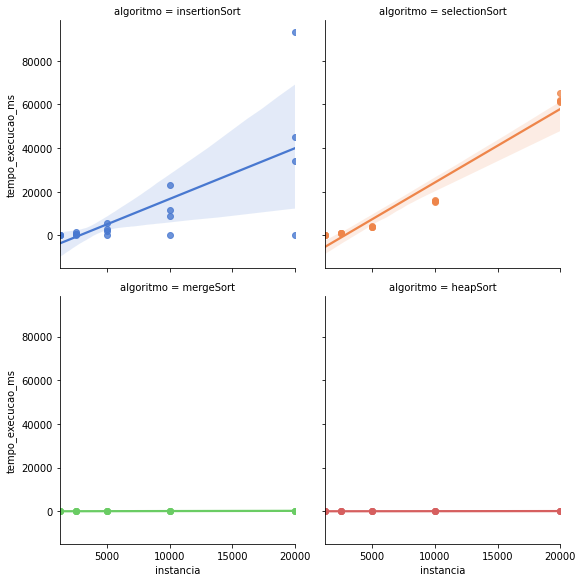

In [84]:
# Comparação dos 4 algoritmos

sns.lmplot(x="instancia", y="tempo_execucao_ms", col="algoritmo", hue="algoritmo", data=df,
           col_wrap=2, palette="muted", height=4)
plt.show()

O gráfico a seguir mostra a diferença dos tempos de execução entre as diferentes distribuições testadas

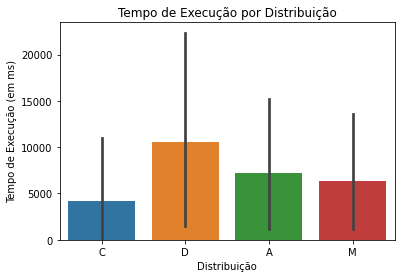

In [85]:
# Gráfico: Tempo de Execução por Distribuição

sns.barplot(data=df, y='tempo_execucao_ms', x='distribuicao')
plt.title('Tempo de Execução por Distribuição')
plt.xlabel('Distribuição')
plt.ylabel('Tempo de Execução (em ms)')
plt.show()

*Normalmente, os dados ordenados de forma decrescente são o "pior caso"*

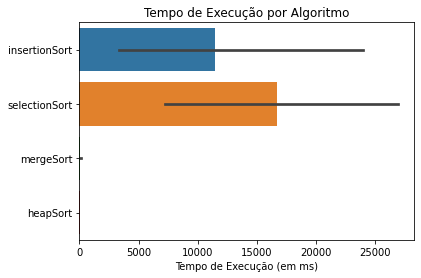

In [86]:
# Gráfico: Tempo de Execução por Algoritmo

sns.barplot(data=df, y='algoritmo', x='tempo_execucao_ms')
plt.title('Tempo de Execução por Algoritmo')
plt.xlabel('Tempo de Execução (em ms)')
plt.ylabel('')
plt.show()

Podemos perceber que os algoritmos de **mergeSort** e **heapSort** "não aparecem no gráfico" pois foram executados muito mais rapidamente que o de **insertionSort** e **selectionSort**

Temos abaixo o cenário menos eficiente (maior tempo de execução)

In [87]:
# Menos eficiente (maior tempo de execução)
df.iloc[df['tempo_execucao_ms'].idxmax()]

algoritmo            insertionSort
instancia                    20000
distribuicao                     D
tempo_execucao_s             93.37
tempo_execucao_ms          93366.7
Name: 1, dtype: object

E o cenário mais eficiente (menor tempo de execução)

In [88]:
# Mais eficiente (menor tempo de execução)
df.iloc[df['tempo_execucao_ms'].idxmin()]

algoritmo            insertionSort
instancia                     1250
distribuicao                     C
tempo_execucao_s                 0
tempo_execucao_ms             0.61
Name: 16, dtype: object

## Analisando os dados de ordenação da máquina do *Manoel*:

In [89]:
# Carrega os dados da tabela (para criação dos gráficos)
df = pd.read_csv('https://raw.githubusercontent.com/Dssdiego/paa_trabalho2/main/tempo_execucao_medio_manoel.csv')
df = df.drop(df.columns[0], axis=1) # Elimina a primeira coluna (desnecessária)
df

,algoritmo,instancia,distribuicao,tempo_execucao_s,tempo_execucao_ms
0,insertionSort,20000,C,0.01,5.86
1,insertionSort,20000,D,55.31,55309.02
2,insertionSort,20000,A,27.40,27403.00
3,insertionSort,20000,M,20.73,20730.97
4,insertionSort,10000,C,0.00,2.93
...,...,...,...,...,...
75,heapSort,2500,M,0.01,5.86
76,heapSort,1250,C,0.00,2.93
77,heapSort,1250,D,0.00,2.93
78,heapSort,1250,A,0.00,2.93


Fazemos um comparação geral entre os 4 algoritmos

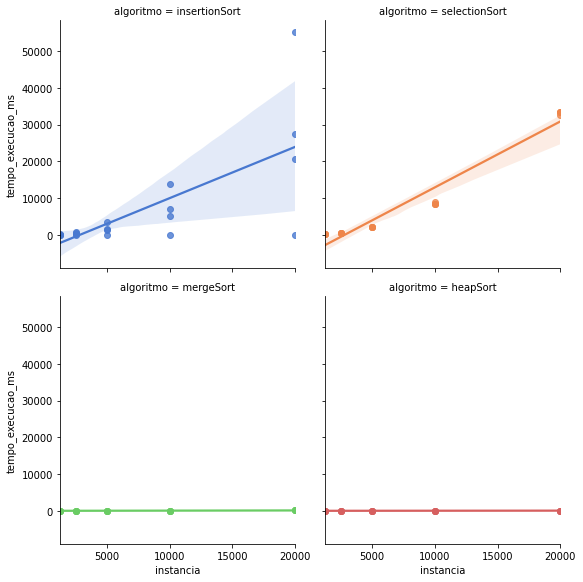

In [90]:
# Comparação dos 4 algoritmos

sns.lmplot(x="instancia", y="tempo_execucao_ms", col="algoritmo", hue="algoritmo", data=df,
           col_wrap=2, palette="muted", height=4)
plt.show()

O gráfico a seguir mostra a diferença dos tempos de execução entre as diferentes distribuições testadas

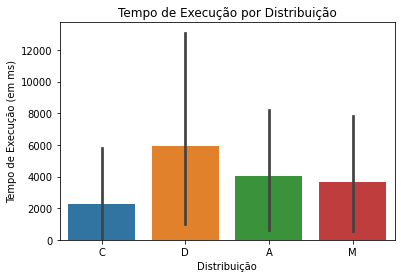

In [95]:
# Gráfico: Tempo de Execução por Distribuição

sns.barplot(data=df, y='tempo_execucao_ms', x='distribuicao')
plt.title('Tempo de Execução por Distribuição')
plt.xlabel('Distribuição')
plt.ylabel('Tempo de Execução (em ms)')
plt.show()

*Normalmente, os dados ordenados de forma decrescente são o "pior caso"*

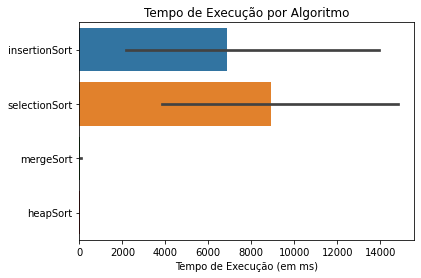

In [94]:
# Gráfico: Tempo de Execução por Algoritmo

sns.barplot(data=df, y='algoritmo', x='tempo_execucao_ms')
plt.title('Tempo de Execução por Algoritmo')
plt.xlabel('Tempo de Execução (em ms)')
plt.ylabel('')
plt.show()

Podemos perceber que os algoritmos de **mergeSort** e **heapSort** "não aparecem no gráfico" pois foram executados muito mais rapidamente que o de **insertionSort** e **selectionSort**

Temos abaixo o cenário menos eficiente (maior tempo de execução)

In [91]:
# Menos eficiente (maior tempo de execução)
df.iloc[df['tempo_execucao_ms'].idxmax()]

algoritmo            insertionSort
instancia                    20000
distribuicao                     D
tempo_execucao_s             55.31
tempo_execucao_ms            55309
Name: 1, dtype: object

E o cenário mais eficiente (menor tempo de execução)

In [92]:
# Mais eficiente (menor tempo de execução)
df.iloc[df['tempo_execucao_ms'].idxmin()]

algoritmo            insertionSort
instancia                     2500
distribuicao                     C
tempo_execucao_s                 0
tempo_execucao_ms             0.98
Name: 12, dtype: object

## Conclusão

Podemos perceber, pelos dados coletados das análises, que as implementações seguiram o esperado em relação às complexidades já conhecidas destes algoritmos.

![alt text](https://raw.githubusercontent.com/Dssdiego/paa_trabalho2/main/images/bigo_algorithms.png "Big O")

*Retirado do site: https://www.bigocheatsheet.com*

### Pontos Positivos

Realizar uma implementação em Python através do Colab do Google permitiu uma facilidade na criação dos gráficos e na análise do melhor/pior algoritmo, pois é uma linguagem fácil de se trabalhar e que contém bibliotecas de análise de dados já bem estabelecidas e funcionais.

### Dificuldades

Tivemos uma dificuldade na análise do desempenho, pois haviam instâncias muito grandes (2 milhões de dados) que ficavam executando por muito tempo, o que nos levou a implementar um timeout para a execução do algoritmo (máximo de 20 minutos, no caso) e a realização da análise para tamanhos de instâncias fracionados.
